# Algoritmos de optimización - Reto 2

Nombre: Antonio Manuel Míguez Vega<br>
Github: https://github.com/ammiguezvega/MIAR/blob/main/Algoritmos_R2.ipynb<br>

## Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

### Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

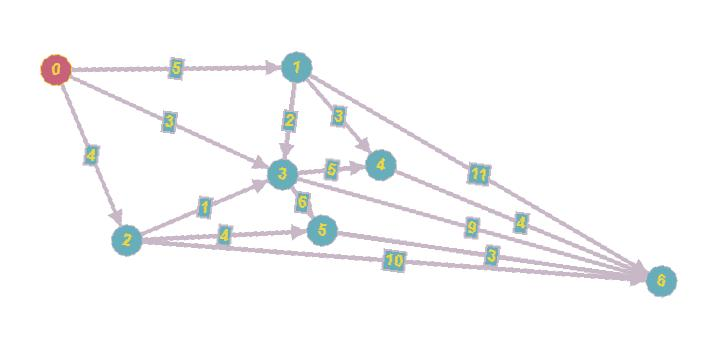

* Resuelve el problema del descenso por el rio utilizando la técnica de optimización que consideres más adecuada.

Menor costo para llegar al embarcadero final: 11
Ruta óptima: [0, 2, 5, 6]


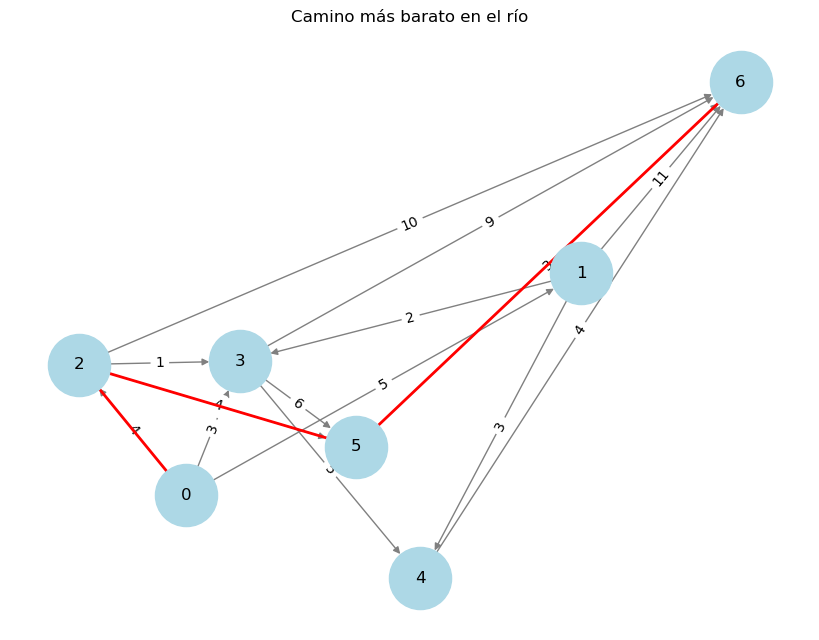

In [ ]:
#Viaje por el rio - Programación dinámica
################################################################################

# Si modelamos el problema como un grafo dirigido acíclico (DAG), donde los nodos representan los embarcaderos 
# y las aristas los tramos de río, podemos resolverlo con programación dinámica.
# En este caso, el costo de cada arista es el tiempo que se tarda en recorrer el tramo de río correspondiente.
# Para encontrar el camino más barato desde el embarcadero 0 hasta el embarcadero 6, podemos seguir estos pasos:
# 1. Ordenar topológicamente el grafo.
# 2. Inicializar los costos de los nodos con infinito, excepto el nodo inicial que tiene costo 0.
# 3. Inicializar los predecesores para reconstruir la ruta óptima.
# 4. Aplicar el algoritmo de programación dinámica sobre el DAG.
# 5. Reconstruir el camino mínimo desde el nodo inicial hasta el nodo final.
# 6. Calcular el costo total y mostrar la ruta óptima.
# 7. Visualizar el grafo con la ruta óptima resaltada.

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Definir el número de embarcaderos (nodos)
n = 7  # Desde 0 hasta 6

# Grafo con costos (formato: nodo_origen, nodo_destino, costo)
edges = [
    (0, 1, 5), (0, 2, 4), (0, 3, 3),
    (1, 3, 2), (1, 4, 3), (1, 6, 11),
    (2, 3, 1), (2, 5, 4), (2, 6, 10),
    (3, 4, 5), (3, 5, 6), (3, 6, 9),
    (4, 6, 4),
    (5, 6, 3)
]

# Construcción del grafo dirigido
G = nx.DiGraph()
G.add_weighted_edges_from(edges)

# Ordenación topológica
topo_order = list(nx.topological_sort(G))

# Inicialización de costos con infinito
costs = {node: float('inf') for node in G.nodes}
costs[0] = 0  # El nodo inicial tiene costo 0

# Inicialización de predecesores para reconstruir la ruta óptima
prev = {node: None for node in G.nodes}

# Algoritmo de Programación Dinámica sobre el DAG
for node in topo_order:
    for neighbor in G.neighbors(node):
        weight = G[node][neighbor]['weight']
        if costs[node] + weight < costs[neighbor]:
            costs[neighbor] = costs[node] + weight
            prev[neighbor] = node

# Reconstrucción del camino mínimo desde 0 hasta 6
path = []
current = 6
while current is not None:
    path.append(current)
    current = prev[current]
path.reverse()

# Resultados
print(f"Menor costo para llegar al embarcadero final: {costs[6]}")
print(f"Ruta óptima: {path}")

# Visualización del grafo con la ruta óptima resaltada
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, 'weight')

# Dibujar el grafo
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=12)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

# Resaltar la ruta óptima
path_edges = list(zip(path, path[1:]))
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)

plt.title("Camino más barato en el río")
plt.show()



## Descenso del gradiente

In [2]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
#import scipy as sc

import random

Vamos a buscar el minimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [3]:
#Definimos la funcion
#Paraboloide
f  = lambda X:      X[0]**2 + X[1]**2    #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

df([1,2])

[2, 4]

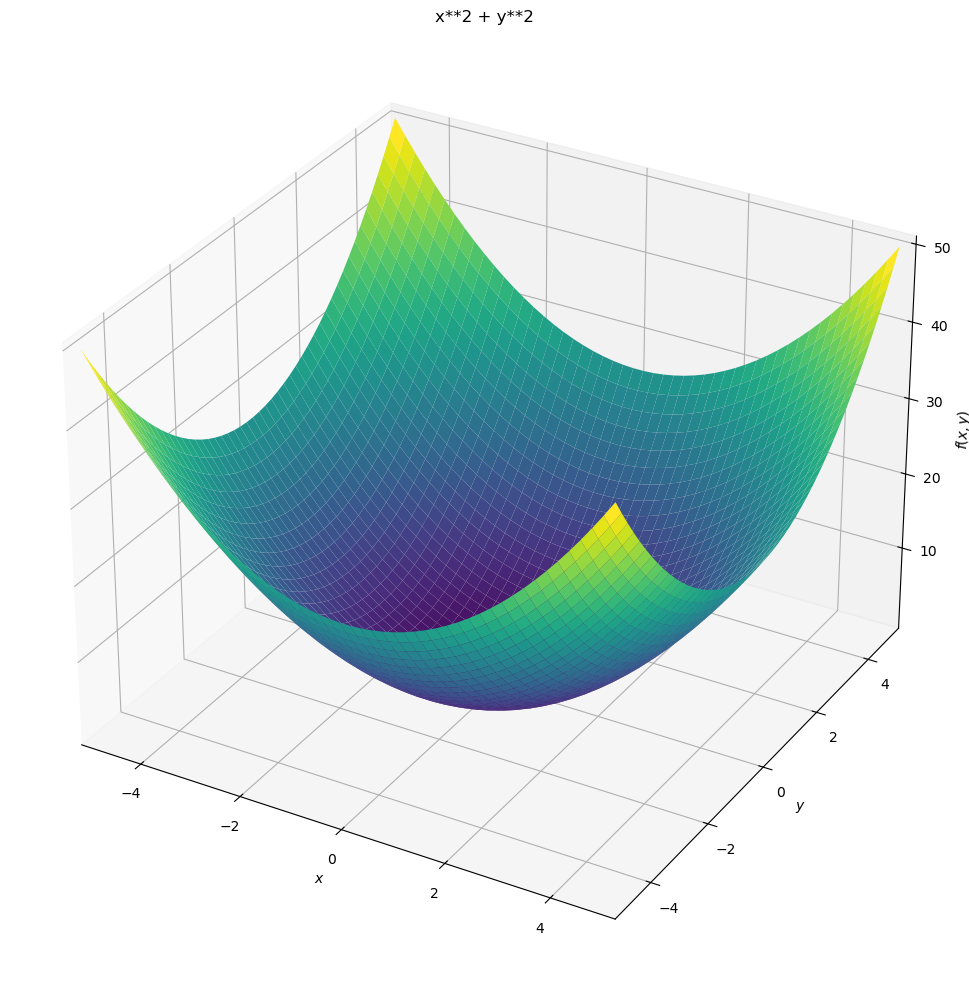

In [4]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(10,10))

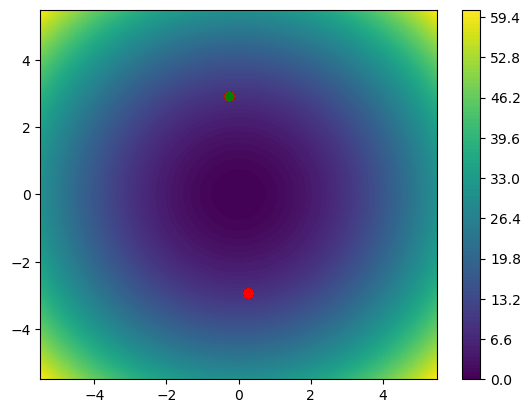

Solucion: [-0.27351192645943634, 2.9187007225706365] 8.593622681849908


In [5]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=1

#Iteraciones:50
for _ in range(1000):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


## Reto

Optimizar la función siguiente mediante el algoritmo por descenso del gradiente.

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>
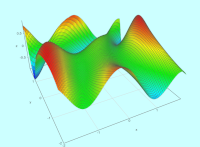


Convergencia alcanzada en la iteración 566.
Punto óptimo: [2.20178355389644, 1.6870590047919645]
Valor mínimo encontrado: -0.9999999999829919


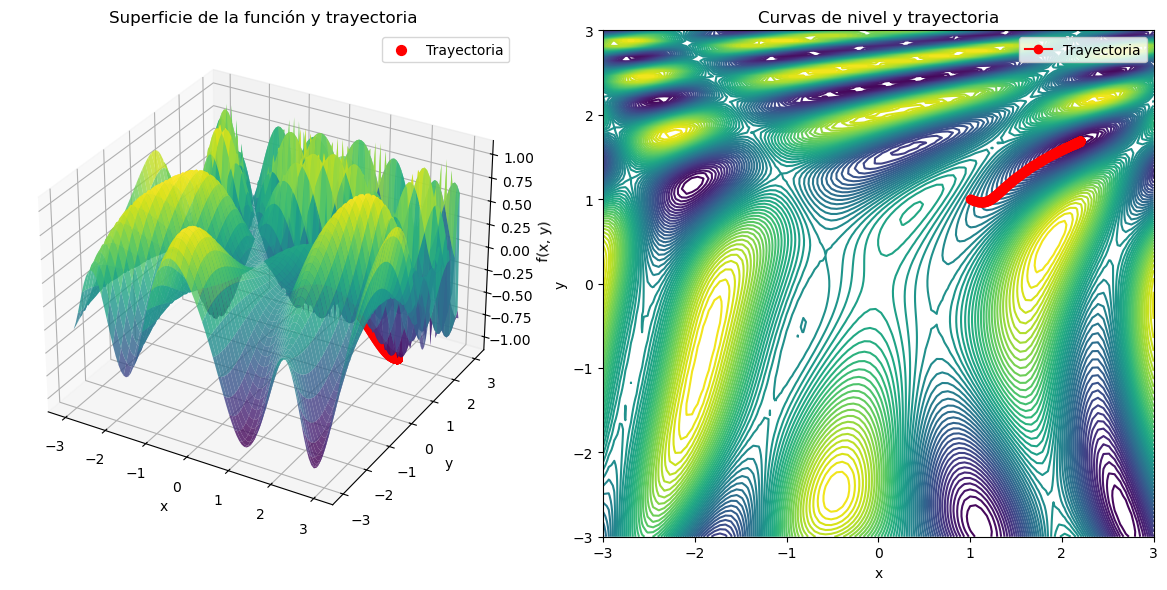

In [16]:
import math
import numpy as np
import matplotlib.pyplot as plt

#Definimos la funcion
f= lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) *math.cos(2*X[0] + 1 - math.exp(X[1]) )

# Definimos el gradiente
def gradient(X):
    x, y = X[0], X[1]
    A = 0.5 * x**2 - 0.25 * y**2 + 3
    B = 2 * x + 1 - math.exp(y)
    cos_A, sin_A = math.cos(A), math.sin(A)
    cos_B, sin_B = math.cos(B), math.sin(B)
    df_dx = cos_A * x * cos_B - 2 * sin_A * sin_B
    df_dy = (-0.5 * y) * cos_A * cos_B + math.exp(y) * sin_A * sin_B
    return [df_dx, df_dy]

# Parámetros del algoritmo
alpha = 0.01  # Tasa de aprendizaje
epsilon = 1e-5  # Criterio de convergencia
max_iterations = 1000
X = [1.0, 1.0]  # Punto inicial

# Almacenar la trayectoria
trajectory = [X.copy()]

# Descenso del gradiente
for i in range(max_iterations):
    grad = gradient(X)
    grad_norm = math.sqrt(grad[0]**2 + grad[1]**2)
    if grad_norm < epsilon:
        print(f"Convergencia alcanzada en la iteración {i}.")
        break
    X[0] -= alpha * grad[0]
    X[1] -= alpha * grad[1]
    trajectory.append(X.copy())
else:
    print("Máximo de iteraciones alcanzado sin converger.")

print("Punto óptimo:", X)
print("Valor mínimo encontrado:", f(X))

# Convertir la trayectoria en un array de NumPy para graficar
trajectory = np.array(trajectory)

# Crear una malla para graficar la función
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X_mesh, Y_mesh = np.meshgrid(x, y)
Z_mesh = np.zeros_like(X_mesh)

# Evaluar la función en la malla
for i in range(X_mesh.shape[0]):
    for j in range(X_mesh.shape[1]):
        Z_mesh[i, j] = f([X_mesh[i, j], Y_mesh[i, j]])

# Graficar la función y la trayectoria
fig = plt.figure(figsize=(12, 6))

# Gráfico 3D
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X_mesh, Y_mesh, Z_mesh, cmap='viridis', alpha=0.8)
ax1.scatter(trajectory[:, 0], trajectory[:, 1], [f(point) for point in trajectory], color='red', s=50, label='Trayectoria')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x, y)')
ax1.set_title('Superficie de la función y trayectoria')
ax1.legend()

# Gráfico de contorno
ax2 = fig.add_subplot(122)
ax2.contour(X_mesh, Y_mesh, Z_mesh, levels=50, cmap='viridis')
ax2.plot(trajectory[:, 0], trajectory[:, 1], color='red', marker='o', label='Trayectoria')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Curvas de nivel y trayectoria')
ax2.legend()

plt.tight_layout()
plt.show()